Step 1: Import the necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import os
tf.__version__
keras.__version__

'3.10.0'

Step 2: Import a toy dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
# Import the Fashion MNIST dataset into training and testing sets
# Split the dataset into training and testing sets
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Step 3: Normalize and scale the toy dataset

In [3]:
# split the training set into a validation set and a training set
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

# Set the class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]



Example Image

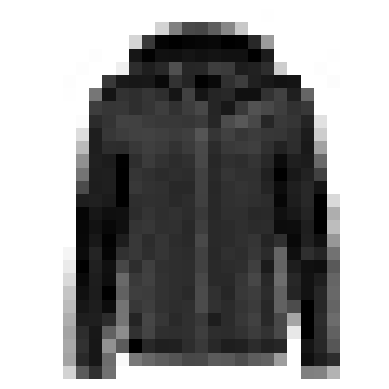

In [4]:
class_names[y_train[0]]
plt.imshow(X_train[0],cmap="binary")
plt.axis('off')
plt.show()

In [5]:
# Investigate the size of the images in the dataset
sample_image_size=X_train[0].shape
print(f"Sample size: {sample_image_size}")
# SHpe of the train set
print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_valid.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y train sample: {y_train[0]}")

Sample size: (28, 28)
Train set shape: (55000, 28, 28)
Validation set shape: (5000, 28, 28)
Test set shape: (10000, 28, 28)
y train shape: (55000,)
y train sample: 4


Created a script to keep track of model validation accuracy and loss

In [6]:
# Create script to keep track of Model performance
log_file = "model_validation_log.csv"

# Create log file if it doesn't exist
if not os.path.exists(log_file):
    df = pd.DataFrame(columns=["Model_Name", "Timestamp", "Val_Loss", "Val_Accuracy"])
    df.to_csv(log_file, index=False)
    
def log_model_validation(model_name, val_loss, val_accuracy):
    df = pd.read_csv(log_file)
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    new_row = {
        "Model_Name": model_name,
        "Timestamp": timestamp,
        "Val_Loss": round(val_loss, 4),
        "Val_Accuracy": round(val_accuracy, 4)
    }
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)
    df.to_csv(log_file, index=False)
    print(f"✅ Logged: {model_name} — Val Acc: {val_accuracy:.4f}, Val Loss: {val_loss:.4f}")


Step 4: Describe the shape of the NN

### Naming Convention for models established to keep track of changes:

D3_ReLU_Adam_LR0.001_HN_DR0.3

Would mean:

- 3 Dense layers

- ReLU activation

- Adam optimizer with learning rate 0.001

- He Normal initializer

- Dropout rate of 0.3



| Abbreviation          | Description                                                               |
| --------------------- | ------------------------------------------------------------------------- |
| `D1`, `D2`, `D3`, ... | Number of **Dense** layers (e.g., `D3` = 3 Dense layers)                  |
| `ReLU`                | **ReLU** activation used in hidden layers                                 |
| `Sigmoid`             | **Sigmoid** activation used in hidden layers                              |
| `Tanh`                | **Tanh** activation used in hidden layers                                 |
| `Softmax`             | **Softmax** activation in output layer (implied for classification tasks) |
| `SGD`                 | **Stochastic Gradient Descent** optimizer                                 |
| `Adam`                | **Adam** optimizer                                                        |
| `RMSprop`             | **RMSprop** optimizer                                                     |
| `LRx.xx`              | Learning Rate used in the optimizer (e.g., `LR0.001`)                     |
| `DRx`                 | **Dropout Rate** used (e.g., `DR0.3` = dropout of 30%)                    |
| `HN`                  | **He Normal** weight initialization (good with ReLU)                      |
| `XG`                  | **Xavier Glorot** initialization (default in Keras for Dense layers)      |
| `BN`                  | **Batch Normalization** layer used                                        |
| `TS`                  | **Tanh-Sigmoid** hybrid activation setup                                  |
| `TSx`                 | Number of **training steps/epochs** (optional, e.g., `TS30`)              |


In [7]:
model_name = "D3_ReLU_SGD_LR0.01_XG"


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers .Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/opt/anaconda3/envs/appliedmlclass/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Print and describe model shape of the NN

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

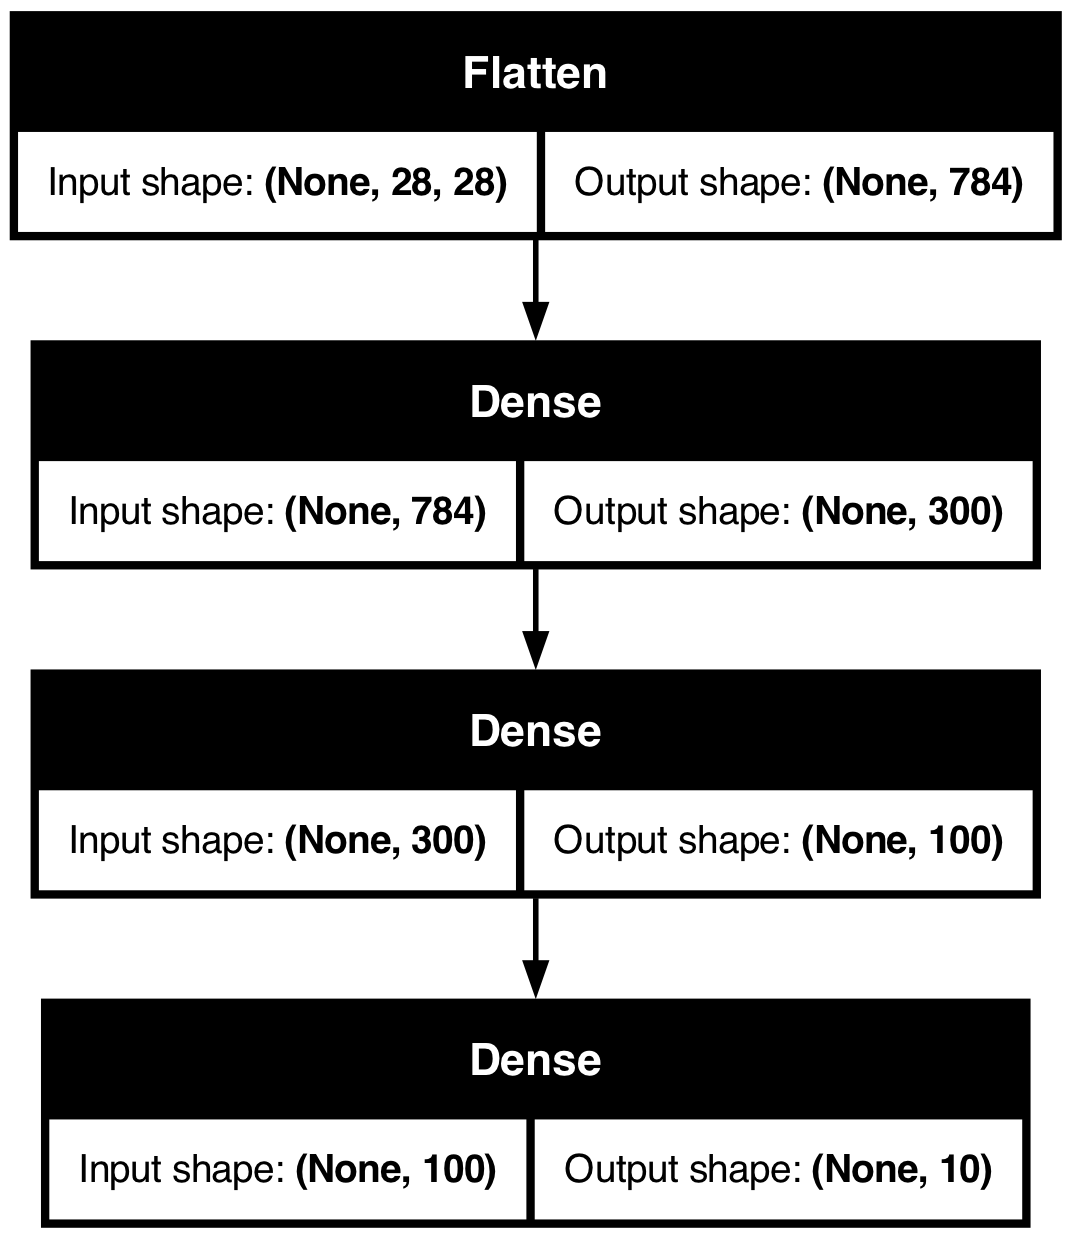

In [8]:
model.summary()
keras .utils.plot_model(model, "erins_fashion_mnist_model.png", show_shapes=True)

More example images

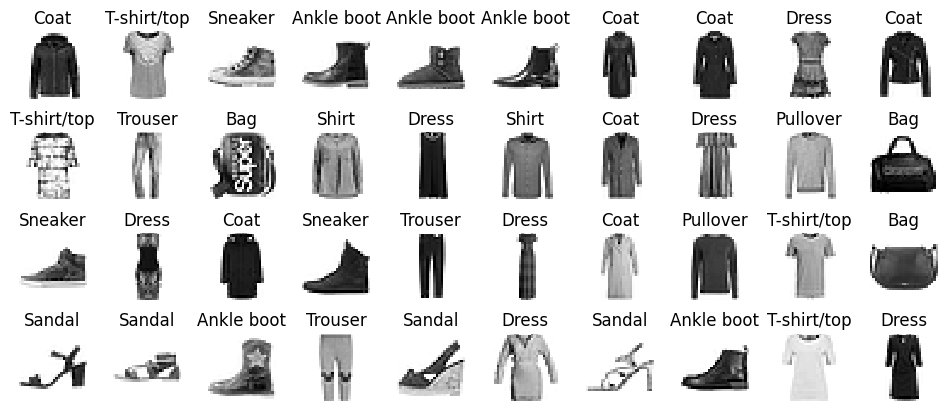

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = row * n_cols + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Step 5: Tell it which optimizer, the loss to minimize, and the metrics to measure

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Step 6: Fit the model, keeping track of validation loss

In [11]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6855 - loss: 0.9865 - val_accuracy: 0.8334 - val_loss: 0.5022
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8279 - loss: 0.4991 - val_accuracy: 0.8396 - val_loss: 0.4705
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 990us/step - accuracy: 0.8464 - loss: 0.4391 - val_accuracy: 0.8600 - val_loss: 0.4100
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - accuracy: 0.8512 - loss: 0.4198 - val_accuracy: 0.8630 - val_loss: 0.3973
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.8620 - loss: 0.3903 - val_accuracy: 0.8464 - val_loss: 0.4209
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.8673 - loss: 0.3793 - val_accuracy: 0.8626 - val_loss: 0.3827
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - accuracy: 0.8711 - loss: 0.3631 - val_accuracy: 0.8714 - val_loss: 0.3662
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8757 - loss:

In [12]:
# Get final validation loss and accuracy
val_loss = history.history["val_loss"][-1]
val_accuracy = history.history["val_accuracy"][-1]

# Log the results
log_model_validation(model_name, val_loss, val_accuracy)

EmptyDataError: No columns to parse from file

Step 7: Plot learning curves

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()

Step 8: Evaluate the trained model on testing data(Delayed this step until )

Apply the following changes to the model and record the model with the highest accuracy. Explain the changes you made and why you think they improved the model.
- change layers
- change optimization
- change initialization
- change nonlinear function
- add regularization

For each model, the following naming convention should be used:


## First Change: Change layers

Here I have decided to change the number of layers in my model by adding another hidden layer with 64 neurons and changing the number of neurons in the second hidden layer to 128. In general, adding more layers and neurons can help the model learn more complex patterns in the data, which may lead to better performance. However it is important to monitor the model's performance on the validation set to avoid overfitting.

In [ ]:
model_name = "D4_ReLU_SGD_LR0.01_XG"
# Describe the shape of the sequential NN with change to number of layers
model = keras.models.Sequential([
    # Made Input(shape) object as first layer to match Keras best practices
    keras.Input(shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers .Dense(300, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()
keras.utils.plot_model(model, "erins_fashion_mnist_model1.png", show_shapes=True)

Kept same optimizer, loss, and metrics as before.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

In [ ]:
# Get final validation loss and accuracy
val_loss = history.history["val_loss"][-1]
val_accuracy = history.history["val_accuracy"][-1]

# Log the results
log_model_validation(model_name, val_loss, val_accuracy)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()

Slight increase in validation accuracy and decrease in validation loss compared to the original model, indicating that the changes made only slightly improves the model's performance.

## Change 2: Change Optimizer

Here i decided to change the optimizer from SGD to Adam. 

Adam(Adaptive movement estimation), in general:
- Faster convergence compared to SGD
- May overfit

In [ ]:
model_name = "D3_ReLU_Adam_LR0.001_XG"

# Describe the shape of the sequential NN with change to optimizer, now using Adam
model = keras.models.Sequential([
    # Made Input(shape) object as first layer to match Keras best practices
    keras.Input(shape=[28, 28]),
    keras.layers.Flatten(),
    keras.layers .Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()
keras.utils.plot_model(model, "erins_fashion_mnist_model2.png", show_shapes=True)

In [ ]:
# Describe the shape of the sequential NN with change to optimizer, now using Adam
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
# Fit the model with the new optimizer
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

In [ ]:
# Get final validation loss and accuracy
val_loss = history.history["val_loss"][-1]
val_accuracy = history.history["val_accuracy"][-1]

# Log the results
log_model_validation(model_name, val_loss, val_accuracy)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.savefig("keras_learning_curves_plot")
plt.show()